In [1]:
import os

# relevant only for this notebook
os.chdir("..")

import MLUtils.evaluation.Training as Training

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer(as_frame=True)
breast_cancer_df = breast_cancer.frame
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test, train_groups = Training.split_train_test(breast_cancer_df, label_column='target', splitter=KFold(), groups=None)

In [5]:
roc_curve_rates = {}

In [6]:
Training.LOGISTIC_REGRESSION_PARAMS

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [7]:
from sklearn.linear_model import LogisticRegression

grid_search, lr_fpr, lr_tpr = Training.eval_grid_search(estimator=LogisticRegression(),
                                             grid_params=Training.LOGISTIC_REGRESSION_PARAMS,
                                             X_train=X_train,
                                             X_test=X_test,
                                             y_train=y_train,
                                             y_test=y_test,
                                             spliter=KFold(),
                                             is_binary=True)

roc_curve_rates['Logistic Regression'] = {
    "fpr": lr_fpr,
    "tpr": lr_tpr
}

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best params
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------
Train classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       144
           1       0.99      1.00      1.00       311

    accuracy                           1.00       455
   macro avg       1.00      0.99      0.99       455
weighted avg       1.00      1.00      1.00       455

--------------------------------------------------
Test classification report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.94      0.98      0.96        46

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------------------------------------
ROC curve sco

C:\Users\itama\anaconda3\envs\mlutils\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\itama\anaconda3\envs\mlutils\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\itama\anaconda3\envs\mlutils\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\itama\anaconda3\envs\mlutils\lib\site-packages\sklearn\linear_model\_logistic.py",

In [8]:
Training.RANDOM_FOREST_PARAMS

{'n_estimators': [100, 200, 500, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [4, 6, 8, 10, 12],
 'criterion': ['gini', 'entropy']}

In [9]:
from sklearn.ensemble import RandomForestClassifier

grid_search, rf_fpr, rf_tpr = Training.eval_grid_search(estimator=RandomForestClassifier(),
                                             grid_params=Training.RANDOM_FOREST_PARAMS,
                                             X_train=X_train,
                                             X_test=X_test,
                                             y_train=y_train,
                                             y_test=y_test,
                                             spliter=KFold(),
                                             is_binary=True)

roc_curve_rates['Random Forest Classifier'] = {
    "fpr": rf_fpr,
    "tpr": rf_tpr
}

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
--------------------------------------------------
Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       311

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

--------------------------------------------------
Test classification report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.85      0.98      0.91        46

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

-------------------------------

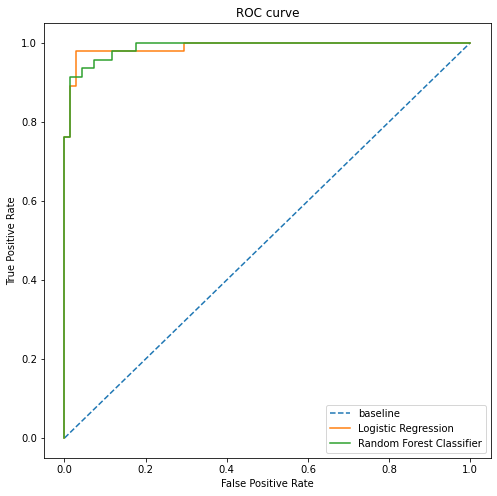

In [10]:
import MLUtils.Visualization as Visualization

Visualization.plot_roc_curve(roc_curve_rates)